# Linear Least-square Regression

Fits a straight line to a set of data points.

## Code: `linearReg` function

In [17]:
def linearReg(x,y):
    """
    linearReg: curve fitting using linear regression 
    
    linearReg(x,y): Least squares fit of a straight line to data 
    input:
      x = independent variable
      y = dependent variable
    output:
      a = vector (regression line slope a[0] and intercept a[1])
      r2 = coefficient of determination
      Syx = standard error of the estimate
      plt = plot handle (can be used to customize the plot outside the function)
    """
    import numpy as np
    # check if x and y vectors have the same length. If not show an error message
    assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
    n = x.shape[0]   #number of elements in x
    # calculate the summations
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_xy = np.sum(x*y)
    sum_y2 = np.sum(y*y)
    a = np.zeros(2, float)  #initiate a with zeros
    a[0] = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    a[1] = sum_y / n - a[0] * sum_x / n
    r2 = ((n * sum_xy - sum_x*sum_y) / np.sqrt(n * sum_x2 - sum_x**2) / np.sqrt(n * sum_y2 - sum_y**2))**2
    Sr = np.sum((y - a[0] * x -a[1])**2)  # total error of the estimate
    Syx = np.sqrt(Sr / (n - 2))
    # plot the regression line along with the data
    import matplotlib.pyplot as plt
    xp = np.linspace(np.min(x), np.max(x),2)
    yp = a[0] * xp + a[1]
    plt.plot(xp,yp)    #regression line
    plt.plot(x,y,'o')  #data
    return a, r2, Syx, plt

## Example:

Use the `linearReg` function to fits a straight line through the following data points. Express $y$ as a function of $x$ using a linear function. Plot the regression line along wih the data. Report the coefficient of determination  ($r^2$), the standard error of the estimate ($S_{y/x}$) and the standard deviation of $y$ data ($S_y$). Based on these values is the regression line a good fit for the data?

| $x$ |  10 | 20| 30 | 40 | 50 | 60 | 70 | 80 | 
|---|---|---|---|---|---|---|---|---|
| $y$ | 25 | 70 | 380 | 550 | 610 | 1220 | 830 | 1450



Linear Regression line: y =  19.470238095238095 * x -234.28571428571422
The coefficient of determination (r^2) = 0.8804852467812263
Standard error of the estimate (Sy/x) = 189.78854670479316
Standard deviation =  475.43360143662545


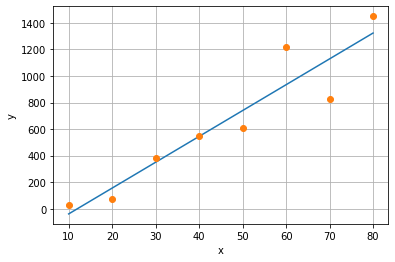

In [18]:
import numpy as np
x = np.array([10.,20.,30.,40., 50., 60., 70., 80.])
y = np.array([25., 70., 380., 550., 610., 1220., 830., 1450.])
a, r2, Syx, plt = linearReg(x,y)
print()
print('Linear Regression line: y = ', a[0],'* x', a[1])
print('The coefficient of determination (r^2) =',r2)
print('Standard error of the estimate (Sy/x) =', Syx)
print('Standard deviation = ', np.std(y))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Since $S_{y/x} < S_y$ the fit has a merit. Also, considering that $r^2$ is close to 1, we can say that the line is a proper fit for the data. This is also confirmed by visually inspecting the plot of line over the data as shown above. However, the fact that $r^2$ is about $0.88$ suggests that the fit is not the best and can be improved. We would prefer $r^2$ value to be larger and closer to, if we possible.

# Linearization of nonlinear relationships

If the curve we consider to fit the data is a nonlinear function, it is sometimes possible to find a mathematical transformation to linearize the curve. If so, we will be able to use linear regression to fit a straight line to the linearized curve. This is done by working with the transformed variables rather than the original ones. Once the linear regression constants are found, the parameters on the original nonlinear curve can be calculated.

We fit the curve $y = c x^\beta$ to the data in the previous example. To do so, we first linearize the function as:
 $\log(y)=\log(c)+\beta \log(x)$ which is the equation of a straight line in $\log(y)-\log(x)$ plane. In this plane, the intercept is $\log(c)$ and the slope is $\beta$. We will then pass the $(\log(x),\log(y))$ data points to `linearReg`. Once linear regression is done, $\beta$  and $\log(c)$ will be determined. $\beta$ is used as the exponent and $c = 10^{\log(c)}$ is calculated for the coefficient of the original curve.


Linear Regression line (linearized function): log(y) =  1.984176255764013  * log(x) -0.5620318023820836
Linear Regression line (original function): y =  0.2741373420132206  * x** 1.984176255764013
The coefficient of determination (r^2) = 0.9480533472023603
Standard error of the estimate (Sy/x) = 0.15324965011903363
Standard deviation =  0.5823060990668985


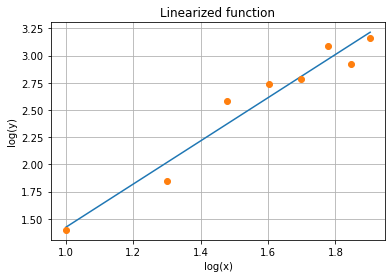

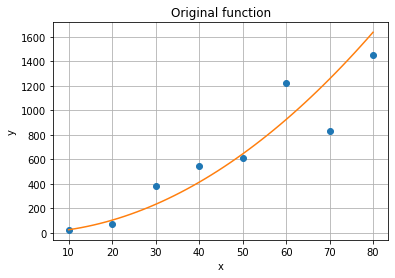

In [19]:
import numpy as np
x = np.array([10.,20.,30.,40., 50., 60., 70., 80.])
y = np.array([25., 70., 380., 550., 610., 1220., 830., 1450.])
a, r2, Syx, plt = linearReg(np.log10(x),np.log10(y))
print()
print('Linear Regression line (linearized function): log(y) = ', a[0],' * log(x)', a[1])
print('Linear Regression line (original function): y = ', 10**a[1] ,' * x**',a[0])
print('The coefficient of determination (r^2) =',r2)
print('Standard error of the estimate (Sy/x) =', Syx)
print('Standard deviation = ', np.std(np.log10(y)))
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Linearized function')
plt.grid(True)
plt.show();
print()
# Plot of original function
xx = np.linspace(np.min(x),np.max(x))
yy = 10**a[1] * xx**a[0]
plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original function')
plt.grid(True)
plt.show();



Since $S_{y/x} < S_y$ the fit has a merit. Also, we observe that $r^2$ is closer to 1 with the new curve and therefore we obtain a better curve fitting which is a much better representation of the data. This is also confirmed by visually inspecting the plot of line over the data as shown above.

# General linear least-square regression

In general linear regression, a curve of the general form $$y = a_0 Z_0(x) + a_1 Z_1(x) + \ldots + a_m Z_m(x)$$ is used for curve fitting. The functions $Z_0(x), \ldots, Z_m(x)$ are called basis functions. This function can be nonlinear in $x$ but it is linear in the $a_0, \ldots, a_m$ coefficients. To find these coefficients we used the function `genLinearReg` given below. 

1. Prepare a function to define the basis functions and return the basis function matrix $[Z]=\begin{bmatrix}
Z_0(x_1) & \ldots & Z_m(x_1)\\
\vdots & \ddots & \vdots\\
Z_0(x_n) & \ldots & Z_m(x_n)\\
\end{bmatrix}$ where $x_1, \ldots, x_n$ are $n$ given data points.
2. Write a lambda function to the function in step 1.
3. Pass the lambda function from step 2 to `genLinearReg` along with the data points.

For details see the example below.

## Code: `genLinearReg` function

In [20]:
def genLinearReg(func,x,y):
    """
    Generates a general regression curve and plots the curve along with data points
    genLinearReg(func,x,y)
     Input:
         func: an anonymous (lambda) function to the function calculating the basis function (z)
         x,y: data points
     Output:
         a: regression curve coefficients
         r2: coefficient of determination
         Syx = standard error of the estimate
         plt: plot handle (can be used to customize the plot outside the function)
    """
    from scipy.linalg import solve
    import matplotlib.pyplot as plt
    import numpy as np
    
    # calculate the regression curve coefficients 
    z = func(x)
    a = solve(np.dot(z.T,z), np.dot(z.T, y))
    # calculate r2
    sr = np.sum((y - np.dot(z,a))**2)
    r2 = 1. - sr / np.sum((y - np.mean(y))**2)
    # calculate Sy/x
    Syx = np.sqrt(sr/(len(x)-len(a)))
    
    # plot the regression curve along with the data
    xx = np.linspace(np.min(x), np.max(x))
    zz = func(xx)
    yy = np.dot(zz, a)
    plt.plot(xx,yy,'-')
    plt.plot(x,y,'o')
    return a, r2, Syx, plt

## Example

fitting a second order polynomial $v=a_0+a_1t+a_2t^2$ to the following data. Report your results for $a_0$, $a_1$ and $a_2$ as well as the coefficient of determination ($r^2$). Show a plot of the regression curve along with the data. Calculate the standard error of the estimate ($S_{y/x}$) and compare it wwith the standard deviation of $y$ data ($S_y$). Compare the coefficient with those obtained from `polyfit`.
\begin{align*}
&t&&0 &&1 &&2 &&3&&4&&\ \ \ \ 5\\
&v&&2.1 &&7.7 &&13.6 &&27.2 &&40.9 &&\ \ \ \ 61.1
\end{align*}

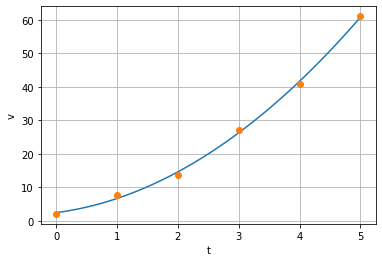

a =  [1.86071429 2.35928571 2.47857143]
r2 =  0.9985093572984047
Sy/x =  1.1175227706213158
Standard deviation (Sy) =  22.42049657493488 > Sy/x : the fit has merit

Comparing with polyfit:
polyfit coefficients:  [1.86071429 2.35928571 2.47857143]


In [21]:
def example_basis_function(x):
    """
    Calculates the basis functions
    Input: 
      x: vector
    Output
      Z: basis function matrix
    """  
    # Define the basis functions in columns of z
    # y = a0 (1) + a1 (x) + a2 (x**2)  -> z0 = 1, z1 = x, z2 = x**2 basis functions
    n = len(x)
    z0 = x**2
    z1 = x
    z2 = np.ones(n,float)
    Z = np.column_stack((z0, z1, z2))
    return Z


import numpy as np
t = np.array([0., 1., 2., 3., 4., 5.])
v = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
f = lambda x: example_basis_function(x) # a lambda function to the example function
a, r2, Syx, plt = genLinearReg(f,t,v)
plt.xlabel('t')
plt.ylabel('v')
plt.grid(True)
plt.show();
print('a = ',a)
print('r2 = ', r2)
print('Sy/x = ', Syx)
Sy= np.std(v, ddof=1)
print('Standard deviation (Sy) = ', Sy, '> Sy/x : the fit has merit')
print()
print('Comparing with polyfit:')
p = np.polyfit(t,v,2)  # the regression curve given is 2nd order
print('polyfit coefficients: ', p)


Similar coefficients are obtained from `polyfit`. Note that `polyfit` reports the coefficient from the highest order to the lowest terms.

# Exercises
1. Use linear regression to fit a straight line to the following data. Check the quality of the fit.

t|| 1 | 2 | 3| 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 |
--- || --- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- | 
v|| 10.00 | 16.30 | 23.00|27.50|31.00|35.60|39.00|41.50|42.90|45.00|46.00|45.50|46.00|49.00|50.00|

2. Use linearization of $y=ax^b$ to the following data. Check the quality of the fit. 

x   | 1   |  2  |  3  |  4  |  5  |
--- | --- | --- | --- | --- | --- |
y   | 0.5 | 1.7 | 3.4 | 5.7 | 8.4 |

3. Use nonlinear regression to the data in Question 2 to the same curve and check the results with those Question 2.

4. Fit the curve $y=a+bx+{c \over x}$ to the following data using general linear regression. Check the quality of the fit.

x   | 1   |  2  |  3  |  4  |  5  |
--- | --- | --- | --- | --- | --- |
y   | 2.2 | 2.8 | 3.6 | 4.5 | 5.5 |
